# CNN 模型預測

In [45]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import sys, os
import pandas as pd
import matplotlib.pyplot as plt

from csidataset import *
import data_loader
from data_loader import *
sys.path.append("/media/mcs/1441ae67-d7cd-43e6-b028-169f78661a2f/kyle/csi_tool")
import denoise
from model import *

In [46]:
base_path = "/media/mcs/1441ae67-d7cd-43e6-b028-169f78661a2f/kyle/csi_tool/csi_dataset/localization_phone/1223_phone/5G/20MHz/csv/all"
#base_path2 = "/media/mcs/1441ae67-d7cd-43e6-b028-169f78661a2f/kyle/csi_tool/csi_dataset/localization_phone/1222_phone/5G/20MHz/csv/all"
#base_path3 = "/media/mcs/1441ae67-d7cd-43e6-b028-169f78661a2f/kyle/csi_tool/csi_dataset/localization_phone/1223_phone/5G/20MHz/csv/all"

In [47]:
reference_points = {}
reference_points2 = {}
reference_points3 = {}
spacing = 0.6  # 每隔 0.6m

for ref_id, coord in data_loader.COORDINATES.items():
    folder_path = os.path.join(base_path, f"reference_point_{ref_id}.xlsx")
    reference_points[folder_path] = (ref_id, coord)

# for ref_id, coord in data_loader.COORDINATES.items():
#     folder_path = os.path.join(base_path2, f"reference_point_{ref_id}.xlsx")
#     reference_points2[folder_path] = (ref_id, coord)


# for ref_id, coord in data_loader.COORDINATES.items():
#     folder_path = os.path.join(base_path3, f"reference_point_{ref_id}.xlsx")
#     reference_points3[folder_path] = (ref_id, coord)

In [48]:
data, rp_labels, coord_labels = load_data(reference_points)

In [49]:
data.shape

(24500, 98)

In [50]:
import numpy as np
import pandas as pd

target_count = 401
unique_labels = np.unique(rp_labels)

filtered_data = []
filtered_rp_labels = []
filtered_coord_labels = []

for label in unique_labels:
    indices = np.where(rp_labels == label)[0]

    if len(indices) < target_count:
        print(f"Label {label} only has {len(indices)} samples, skipped.")
        continue

    selected_indices = indices[:target_count]  # ✅ 固定取最前面的 401 筆

    filtered_data.append(data.iloc[selected_indices])
    filtered_rp_labels.append(rp_labels[selected_indices])
    filtered_coord_labels.append(coord_labels.iloc[selected_indices])

# ✅ 合併，確保型別一致
data_filtered = pd.concat(filtered_data, ignore_index=True)  # DataFrame
rp_labels_filtered = np.concatenate(filtered_rp_labels, axis=0)  # ndarray
coord_labels_filtered = pd.concat(filtered_coord_labels, ignore_index=True)  # DataFrame

# ✅ 驗證
print("✅ 合併後資料型別：")
print("data_filtered:", type(data_filtered), data_filtered.shape)
print("rp_labels_filtered:", type(rp_labels_filtered), rp_labels_filtered.shape)
print("coord_labels_filtered:", type(coord_labels_filtered), coord_labels_filtered.shape)

print("\n每個 label 筆數（應該都為 401）：")
print(pd.Series(rp_labels_filtered).value_counts().sort_index())






✅ 合併後資料型別：
data_filtered: <class 'pandas.core.frame.DataFrame'> (19649, 98)
rp_labels_filtered: <class 'numpy.ndarray'> (19649,)
coord_labels_filtered: <class 'pandas.core.frame.DataFrame'> (19649, 2)

每個 label 筆數（應該都為 401）：
1     401
2     401
3     401
4     401
5     401
6     401
7     401
8     401
9     401
10    401
11    401
12    401
13    401
14    401
15    401
16    401
17    401
18    401
19    401
20    401
21    401
22    401
23    401
24    401
25    401
26    401
27    401
28    401
29    401
30    401
31    401
32    401
33    401
34    401
35    401
36    401
37    401
38    401
39    401
40    401
41    401
42    401
43    401
44    401
45    401
46    401
47    401
48    401
49    401
Name: count, dtype: int64


In [51]:
data_filtered

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,97
0,919.592301,929.595611,877.760787,898.203763,851.400023,893.573164,888.473973,871.023536,836.316328,841.770753,...,-1.387518,-1.581549,-1.708760,-2.080869,-2.287379,-2.467120,-2.666997,-2.982241,-50.0,136.0
1,698.204841,732.963846,684.079674,694.257877,651.079872,672.521375,687.674342,780.946221,803.560203,863.103702,...,-2.677159,-2.877730,-3.051501,2.738820,2.503722,2.256683,2.035376,1.737005,-49.0,148.0
2,745.268408,768.188128,706.606680,713.252410,681.482208,713.950278,736.619983,852.877482,846.442556,880.032954,...,0.176051,-0.063704,-0.251636,-0.776139,-1.023850,-1.275624,-1.535994,-1.899522,-50.0,224.0
3,830.278267,829.860832,804.005597,796.492310,786.787138,800.870776,791.982323,778.923616,763.872372,766.167084,...,-1.031820,-1.194379,-1.338067,-1.666445,-1.878363,-2.100073,-2.369892,-2.666982,-51.0,136.0
4,906.099884,903.507056,910.843565,896.688352,892.235955,875.416472,878.300632,854.687077,857.886939,843.664033,...,-0.445534,-0.593750,-0.783166,-1.090942,-1.286103,-1.497279,-1.784787,-2.076610,-50.0,136.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19644,381.980366,398.527289,370.951479,372.108855,352.346420,359.233907,370.000000,413.997585,420.138073,454.862617,...,-0.475208,-0.668036,-0.872238,-1.396551,-1.667962,-1.977215,-2.212040,-2.563840,-56.0,148.0
19645,737.651679,730.928861,707.471554,673.190909,665.090219,689.385233,679.574131,666.066813,646.891026,636.792745,...,0.602202,0.417030,0.233346,-0.227937,-0.474118,-0.747335,-1.038664,-1.386254,-58.0,136.0
19646,364.329521,391.318285,383.775976,384.610192,367.828765,339.330223,346.236913,376.766506,421.283752,448.486343,...,-1.877905,-1.877905,2.906870,1.246783,0.451070,-0.370119,-1.260481,-2.098871,-57.0,148.0
19647,396.021464,409.890229,392.439804,391.154701,374.786606,380.443163,384.193961,434.991954,450.813709,472.956658,...,1.654569,1.488145,1.336005,0.979841,0.765983,0.532844,0.208257,-0.127813,-58.0,224.0


In [53]:
amp_data = np.array(data_filtered.iloc[:, :48])  
phase_data = np.array(data_filtered.iloc[:, 48:-2]) 

In [54]:
# amp_data1_2 = np.concatenate((amp_data, amp_data2), axis=0)
# phase_data1_2 = np.concatenate((phase_data, phase_data2), axis=0)
# rp_labels1_2 = np.concatenate((rp_labels, rp_labels2), axis=0)
# coord_labels1_2 = np.concatenate((coord_labels, coord_labels2), axis=0)

In [55]:
#amp_d = denoise.preprocess_csi_for_fingerprint2(amp_data)

In [69]:
encoder = OneHotEncoder(sparse_output=False)
one_hot_labels = encoder.fit_transform(np.array(rp_labels_filtered).reshape(-1, 1))


In [70]:
amp_train, amp_temp, y_train, y_temp = train_test_split(amp_data, one_hot_labels, test_size=0.3, random_state=42)
amp_val, amp_test, y_val, y_test = train_test_split(amp_temp, y_temp, test_size=1/3, random_state=42)

In [71]:
amp_train.shape

(13754, 48)

In [73]:
# 創建 Dataset 和 DataLoader

batch_size = 32

train_dataset = CSIDataset(amp_train, y_train)
val_dataset = CSIDataset(amp_val, y_val)
test_dataset = CSIDataset(amp_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# 模型設定


In [74]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

class CNNClassifier(nn.Module):
    def __init__(self, num_classes=49):
        super(CNNClassifier, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm1d(64)
        self.pool1 = nn.MaxPool1d(kernel_size=2)

        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm1d(128)
        self.pool2 = nn.MaxPool1d(kernel_size=2)

        self.flatten_dim = 128 * 12  # 48 -> 24 -> 12 after pooling

        self.fc1 = nn.Linear(self.flatten_dim, 128)
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(64, num_classes)

    def forward(self, x):
        # Ensure input is in the shape (batch_size, channels, length)
        if x.dim() == 2:
            x = x.unsqueeze(1)

        if x.shape[1] != 1:
            x = x.permute(0, 2, 1)  # (batch_size, 1, 48)

        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool1(x)

        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool2(x)

        x = x.view(x.size(0), -1)  # Flatten

        x = F.relu(self.fc1(x))
        x = self.dropout1(x)

        x = F.relu(self.fc2(x))
        x = self.dropout2(x)

        x = self.fc3(x)
        return x

# Initialize the model
model = CNNClassifier(num_classes=49).to(device)

# Print model summary
summary(model, input_size=(1, 48))  # Input shape: (channels, length)

Using device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1               [-1, 64, 48]             256
       BatchNorm1d-2               [-1, 64, 48]             128
         MaxPool1d-3               [-1, 64, 24]               0
            Conv1d-4              [-1, 128, 24]          24,704
       BatchNorm1d-5              [-1, 128, 24]             256
         MaxPool1d-6              [-1, 128, 12]               0
            Linear-7                  [-1, 128]         196,736
           Dropout-8                  [-1, 128]               0
            Linear-9                   [-1, 64]           8,256
          Dropout-10                   [-1, 64]               0
           Linear-11                   [-1, 49]           3,185
Total params: 233,521
Trainable params: 233,521
Non-trainable params: 0
----------------------------------------------------------------
Input size 

# 模型訓練

In [75]:
import torch.nn as nn
import torch.optim as optim

# 損失函數
criterion = nn.CrossEntropyLoss()

# 優化器
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# 學習率調整器
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=15, verbose=True)


/home/mcs/anaconda3/envs/kyle_ai/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


# 多次測試 cls

In [ ]:
#多次測試new + best model

In [76]:
def compute_mean_distance_error(y_true, y_pred, coordinates):
    """
    y_true, y_pred: 一維的 NumPy 陣列，分別存放真實和預測的 label（整數）
    coordinates: dict, label -> (x, y)
    """
    errors = []

    for true_label, pred_label in zip(y_true, y_pred):
        # 取出對應的座標
        if true_label not in coordinates or pred_label not in coordinates:
            # 若某個 label 不在座標字典內，就跳過（或視需求處理）
            print(f"Label {true_label} or {pred_label} not in coordinates.")
            continue
        true_coord = np.array(coordinates[true_label])
        pred_coord = np.array(coordinates[pred_label])
        # 計算歐氏距離
        error = np.linalg.norm(pred_coord - true_coord)
        errors.append(error)
    return np.mean(errors) , errors

COORDINATES = {
    # 下邊界 (1-10 和 40-31)
    1: (0, 0), 40: (0.6, 0), 39: (1.2, 0), 38: (1.8, 0), 37: (2.4, 0),
    36: (3.0, 0), 35: (3.6, 0), 34: (4.2, 0), 33: (4.8, 0), 32: (5.4, 0), 31: (6.0, 0),

    # 左邊界 (1-11)
    2: (0, 0.6), 3: (0, 1.2), 4: (0, 1.8), 5: (0, 2.4),
    6: (0, 3.0), 7: (0, 3.6), 8: (0, 4.2), 9: (0, 4.8), 10: (0, 5.4), 11: (0, 6.0),

    # 上邊界 (11-21)
    12: (0.6, 6.0), 13: (1.2, 6.0), 14: (1.8, 6.0), 15: (2.4, 6.0),
    16: (3.0, 6.0), 17: (3.6, 6.0), 18: (4.2, 6.0), 19: (4.8, 6.0),
    20: (5.4, 6.0), 21: (6.0, 6.0),

    # 右邊界 (21-31)
    22: (6.0, 5.4), 23: (6.0, 4.8), 24: (6.0, 4.2), 25: (6.0, 3.6),
    26: (6.0, 3.0), 27: (6.0, 2.4), 28: (6.0, 1.8), 29: (6.0, 1.2), 30: (6.0, 0.6),

    # 中間點 (41-49)
    41: (3.0, 0.6), 42: (3.0, 1.2), 43: (3.0, 1.8),
    44: (3.0, 2.4), 45: (3.0, 3.0), 46: (3.0, 3.6),
    47: (3.0, 4.2), 48: (3.0, 4.8), 49: (3.0, 5.4)
}

In [77]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import pandas as pd
import os
from torchsummary import summary

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 假設你已定義 CNNClassifier 類別
# 假設 COORDINATES 與 compute_mean_distance_error 已正確定義

num_runs = 5
epochs = 200
patience = 20

test_accs = []
test_mdes = []
all_run_errors = []

for run in range(1, num_runs + 1):
    print(f"\n=== Run {run}/{num_runs} ===")
    model = CNNClassifier(num_classes=49).to(device)
    optimizer = optim.Adam(model.parameters(), lr=1e-3)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=15)
    criterion = nn.CrossEntropyLoss()
    best_val_loss = float('inf')
    counter = 0

    best_model_path = "best_model_tmp.pth"
    for epoch in range(epochs):
        model.train()
        for csi_inputs, labels in train_loader:
            csi_inputs, labels = csi_inputs.to(device), labels.to(device)
            target_class = torch.argmax(labels, dim=1)
            optimizer.zero_grad()
            class_out = model(csi_inputs)
            loss = criterion(class_out, target_class)
            loss.backward()
            optimizer.step()

        # 驗證
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for csi_inputs, labels in val_loader:
                csi_inputs, labels = csi_inputs.to(device), labels.to(device)
                target_class = torch.argmax(labels, dim=1)
                class_out = model(csi_inputs)
                val_loss += criterion(class_out, target_class).item() * csi_inputs.size(0)

        val_loss /= len(val_loader.dataset)
        scheduler.step(val_loss)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            counter = 0
            torch.save(model.state_dict(), best_model_path)
        else:
            counter += 1
            if counter >= patience:
                break

    # 測試
    model.load_state_dict(torch.load(best_model_path))
    model.eval()
    all_true, all_pred = [], []
    with torch.no_grad():
        for csi_inputs, labels in test_loader:
            csi_inputs, labels = csi_inputs.to(device), labels.to(device)
            target_class = torch.argmax(labels, dim=1)
            class_out = model(csi_inputs)
            pred = torch.argmax(class_out, dim=1)
            all_pred.extend(pred.cpu().numpy())
            all_true.extend(target_class.cpu().numpy())

    y_true = np.array(all_true) + 1
    y_pred = np.array(all_pred) + 1
    acc = 100 * np.mean(y_true == y_pred)
    mde, error = compute_mean_distance_error(y_true, y_pred, COORDINATES)

    test_accs.append(acc)
    test_mdes.append(mde)
    all_run_errors.append(error)

    print(f"✅ Run {run}: Acc = {acc:.2f}%, MDE = {mde:.4f}")

# === 儲存所有結果 ===
output_folder = "repeat_copy/00"
os.makedirs(output_folder, exist_ok=True)

# 1. 每 run 的 acc/mde
df = pd.DataFrame({
    "run": list(range(1, num_runs + 1)),
    "accuracy": test_accs,
    "mde": test_mdes
})
df.to_csv(f"{output_folder}/csicls_results00_b.csv", index=False)

# 2. 所有測試誤差（長格式）
errors_flat = []
for run_idx, errors in enumerate(all_run_errors):
    for sample_idx, e in enumerate(errors):
        errors_flat.append({
            "run": run_idx + 1,
            "sample_idx": sample_idx + 1,
            "error": e
        })
df_errors = pd.DataFrame(errors_flat)
df_errors.to_csv(f"{output_folder}/csicls_all_errors00_b.csv", index=False)

# 3. Summary（平均與標準差）
summary_df = pd.DataFrame([{
    "avg_acc": np.mean(test_accs),
    "std_acc": np.std(test_accs),
    "avg_mde": np.mean(test_mdes),
    "std_mde": np.std(test_mdes)
}])
summary_df.to_csv(f"{output_folder}/csicls_summary00_b.csv", index=False)

print("📁 所有結果已儲存至 repeat_copy/00/")




=== Run 1/5 ===
✅ Run 1: Acc = 99.59%, MDE = 0.0141

=== Run 2/5 ===
✅ Run 2: Acc = 99.64%, MDE = 0.0132

=== Run 3/5 ===
✅ Run 3: Acc = 98.93%, MDE = 0.0308

=== Run 4/5 ===
✅ Run 4: Acc = 99.59%, MDE = 0.0169

=== Run 5/5 ===
✅ Run 5: Acc = 99.34%, MDE = 0.0269
📁 所有結果已儲存至 repeat_copy/00/


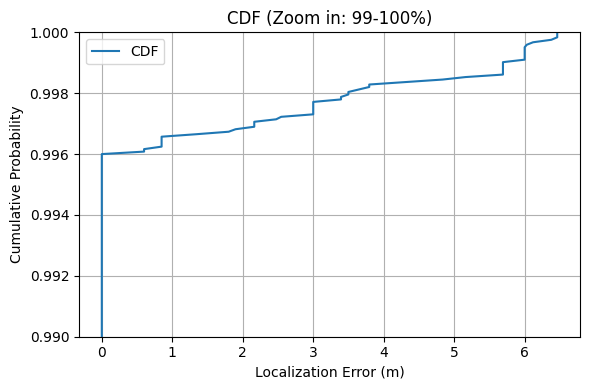

In [ ]:

import matplotlib.pyplot as plt
import numpy as npv

# 假設 errors 是所有測試 error (一維 array)
sorted_errors = np.sort(errors)
cdf = np.arange(1, len(sorted_errors) + 1) / len(sorted_errors)

plt.figure(figsize=(6,4))
plt.plot(sorted_errors, cdf, label="CDF")
plt.xlabel("Localization Error (m)")
plt.ylabel("Cumulative Probability")
plt.title("CDF (Zoom in: 99-100%)")
plt.ylim(0.99, 1.00)        # 重點：壓縮 Y 軸，只顯示 0.99~1.00
plt.grid(True)
plt.legend()
plt.tight_layout()
#plt.savefig("repeat/00/csicls_error_cdf_zoom99.png", dpi=300)
plt.show()


# 多輸出

In [65]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN_DualHead(nn.Module):
    def __init__(self, num_classes=49, regression_dim=2):
        super(CNN_DualHead, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm1d(64)
        self.pool1 = nn.MaxPool1d(kernel_size=2)

        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm1d(128)
        self.pool2 = nn.MaxPool1d(kernel_size=2)

        self.flatten_dim = 128 * 12  # 48 -> 24 -> 12 after pooling

        self.fc1 = nn.Linear(self.flatten_dim, 128)
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.3)

        # Two heads: classification & regression
        self.class_head = nn.Linear(64, num_classes)     # 分類 head
        self.reg_head = nn.Linear(64, regression_dim)    # 回歸 head (預設 2 維)

    def forward(self, x):
        if x.dim() == 2:
            x = x.unsqueeze(1)
        if x.shape[1] != 1:
            x = x.permute(0, 2, 1)

        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool1(x)
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool2(x)
        x = x.view(x.size(0), -1)

        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)

        class_out = self.class_head(x)  # 分類輸出 (logits)
        reg_out = self.reg_head(x)      # 回歸輸出 (通常 2 維)

        return class_out, reg_out


In [66]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model = CNN_DualHead(num_classes=49).to(device)

# 假設你的輸入是 (batch_size, 48)
dummy_input = torch.randn(32, 48).to(device)
cls_out, reg_out = model(dummy_input)

print("分類輸出 (class_out):", cls_out.shape)  # 應為 (32, 49)
print("回歸輸出 (reg_out):", reg_out.shape)    # 應為 (32, 2)



Using device: cuda
分類輸出 (class_out): torch.Size([32, 49])
回歸輸出 (reg_out): torch.Size([32, 2])


In [67]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchinfo import summary  # torchinfo 可用來顯示多輸入模型摘要
import matplotlib.pyplot as plt
# -----------------------
# 損失函數、優化器與學習率調整器設定
# -----------------------
criterion = nn.CrossEntropyLoss()  # 分類損失：target 為 class index
criterion_reg = nn.MSELoss()         # 回歸損失：target 為 (X, Y)
alpha = 0.5  # 回歸損失權重，可根據需要調整

optimizer = optim.Adam(model.parameters(), lr=1e-3)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=15, verbose=True)


In [ ]:
# def compute_mean_distance_error(y_true, y_pred, coordinates):
#     """
#     y_true, y_pred: 一維的 NumPy 陣列，分別存放真實和預測的 label（整數）
#     coordinates: dict, label -> (x, y)
#     """
#     errors = []

#     for true_label, pred_label in zip(y_true, y_pred):
#         # 取出對應的座標
#         if true_label not in coordinates or pred_label not in coordinates:
#             # 若某個 label 不在座標字典內，就跳過（或視需求處理）
#             print(f"Label {true_label} or {pred_label} not in coordinates.")
#             continue
#         true_coord = np.array(coordinates[true_label])
#         pred_coord = np.array(coordinates[pred_label])
#         # 計算歐氏距離
#         error = np.linalg.norm(pred_coord - true_coord)
#         errors.append(error)
#     return np.mean(errors) , errors

# COORDINATES = {
#     # 下邊界 (1-10 和 40-31)
#     1: (0, 0), 40: (0.6, 0), 39: (1.2, 0), 38: (1.8, 0), 37: (2.4, 0),
#     36: (3.0, 0), 35: (3.6, 0), 34: (4.2, 0), 33: (4.8, 0), 32: (5.4, 0), 31: (6.0, 0),
#     # 左邊界 (1-11)
#     2: (0, 0.6), 3: (0, 1.2), 4: (0, 1.8), 5: (0, 2.4),
#     6: (0, 3.0), 7: (0, 3.6), 8: (0, 4.2), 9: (0, 4.8), 10: (0, 5.4), 11: (0, 6.0),
#     # 上邊界 (11-21)
#     12: (0.6, 6.0), 13: (1.2, 6.0), 14: (1.8, 6.0), 15: (2.4, 6.0),
#     16: (3.0, 6.0), 17: (3.6, 6.0), 18: (4.2, 6.0), 19: (4.8, 6.0),
#     20: (5.4, 6.0), 21: (6.0, 6.0),
#     # 右邊界 (21-31)
#     22: (6.0, 5.4), 23: (6.0, 4.8), 24: (6.0, 4.2), 25: (6.0, 3.6),
#     26: (6.0, 3.0), 27: (6.0, 2.4), 28: (6.0, 1.8), 29: (6.0, 1.2), 30: (6.0, 0.6),
#     # 中間點 (41-49)
#     41: (3.0, 0.6), 42: (3.0, 1.2), 43: (3.0, 1.8),
#     44: (3.0, 2.4), 45: (3.0, 3.0), 46: (3.0, 3.6),
#     47: (3.0, 4.2), 48: (3.0, 4.8), 49: (3.0, 5.4)
# }

# def labels_to_coords(label_tensor, coord_dict):
#     coords = []
#     for label in label_tensor:
#         # 將 0-index 轉換成 1-index (例如 0 -> 1, 1 -> 2, ..., 48 -> 49)
#         coords.append(coord_dict[label.item() + 1])
#     return torch.tensor(coords, dtype=torch.float32, device=label_tensor.device)

# # ---------- 3. 訓練設定 ----------
# device   = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# criterion_cls  = nn.CrossEntropyLoss()
# criterion_reg  = nn.MSELoss()

# alphas   = np.arange(0.1, 1.1, 0.1)
# num_runs = 5
# epochs   = 200
# patience = 20

# summary_results = []

# # 假設 train_loader / val_loader / test_loader 僅回傳 (csi_inputs, labels)
# for alpha in alphas:
#     run_acc, run_mde, run_mde_std = [], [], []

#     print(f"\n[Alpha = {alpha:.1f}]  Start {num_runs} runs")
#     for run in range(1, num_runs + 1):
#         print(f"Run {run}/{num_runs}")
#         model = CNN_DualHead(num_classes=49).to(device)
#         optimzr = optim.Adam(model.parameters(), lr=1e-3)
#         sched   = optim.lr_scheduler.ReduceLROnPlateau(optimzr, 'min', 0.5, patience=15)
#         best_val, wait = float('inf'), 0

#         # ----- training with early-stop -----
#         for epoch in range(epochs):
#             model.train()
#             for csi_x, labels in train_loader:
#                 csi_x, labels = csi_x.to(device), labels.to(device)
#                 target = torch.argmax(labels, 1)

#                 cls_out, reg_out = model(csi_x)
#                 loss_cls = criterion_cls(cls_out, target)
#                 loss_reg = criterion_reg(reg_out, labels_to_coords(target, COORDINATES))
#                 loss = loss_cls + alpha * loss_reg

#                 optimzr.zero_grad(); loss.backward(); optimzr.step()

#             # ----- validation -----
#             model.eval(); val_loss = 0
#             with torch.no_grad():
#                 for csi_x, labels in val_loader:
#                     csi_x, labels = csi_x.to(device), labels.to(device)
#                     target = torch.argmax(labels, 1)
#                     cls_out, reg_out = model(csi_x)
#                     v_loss = criterion_cls(cls_out, target) \
#                            + alpha * criterion_reg(reg_out, labels_to_coords(target, COORDINATES))
#                     val_loss += v_loss.item() * csi_x.size(0)

#             val_loss /= len(val_loader.dataset)
#             sched.step(val_loss)

#             if val_loss < best_val:
#                 best_val, wait = val_loss, 0
#             else:
#                 wait += 1
#                 if wait >= patience:
#                     break

#         # ----- testing -----
#         model.eval(); y_true, y_pred = [], []
#         with torch.no_grad():
#             for csi_x, labels in test_loader:
#                 csi_x, labels = csi_x.to(device), labels.to(device)
#                 target = torch.argmax(labels, 1)
#                 cls_out, _ = model(csi_x)
#                 pred = torch.argmax(cls_out, 1)
#                 y_true.extend((target.cpu().numpy() + 1))   # 轉 1-index
#                 y_pred.extend((pred.cpu().numpy()   + 1))

#         acc            = 100 * np.mean(np.array(y_true) == np.array(y_pred))
#         mde_mean, mde_sd = compute_mean_distance_error(y_true, y_pred, COORDINATES)

#         run_acc.append(acc); run_mde.append(mde_mean); run_mde_std.append(mde_sd)
#         print(f"✅ Run {run}: Acc = {acc:.2f}%, MDE = {mde_mean:.4f} ± {mde_sd:.4f}")

#     # ----- 儲存每個 α 的結果 -----
#     alpha_id = int(round(alpha * 10))
#     folder   = f"repeat_2_4/{alpha_id:02d}"
#     os.makedirs(folder, exist_ok=True)

#     pd.DataFrame({
#         'run':     range(1, num_runs + 1),
#         'accuracy':run_acc,
#         'mde':     run_mde,
#         'mde_std': run_mde_std
#     }).to_csv(f"{folder}/csi_cls_reg_results{alpha_id:02d}.csv", index=False)

#     summary_results.append({
#         'alpha':   alpha,
#         'avg_acc': np.mean(run_acc),
#         'std_acc': np.std(run_acc),
#         'avg_mde': np.mean(run_mde),
#         'std_mde': np.std(run_mde)
#     })

# # 最後整合各 α 統計
# summary_df = pd.DataFrame(summary_results)
# # summary_df.to_csv("csi_alpha_comparison_summary.csv", index=False)
# print("\n=== DONE ===")


In [ ]:
#重複跑 Error

In [68]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import os

def compute_mean_distance_error(y_true, y_pred, coordinates):
    errors = []
    for true_label, pred_label in zip(y_true, y_pred):
        if true_label not in coordinates or pred_label not in coordinates:
            print(f"Label {true_label} or {pred_label} not in coordinates.")
            continue
        true_coord = np.array(coordinates[true_label])
        pred_coord = np.array(coordinates[pred_label])
        error = np.linalg.norm(pred_coord - true_coord)
        errors.append(error)
    return np.mean(errors), errors

COORDINATES = {
    1: (0, 0), 40: (0.6, 0), 39: (1.2, 0), 38: (1.8, 0), 37: (2.4, 0),
    36: (3.0, 0), 35: (3.6, 0), 34: (4.2, 0), 33: (4.8, 0), 32: (5.4, 0), 31: (6.0, 0),
    2: (0, 0.6), 3: (0, 1.2), 4: (0, 1.8), 5: (0, 2.4), 6: (0, 3.0),
    7: (0, 3.6), 8: (0, 4.2), 9: (0, 4.8), 10: (0, 5.4), 11: (0, 6.0),
    12: (0.6, 6.0), 13: (1.2, 6.0), 14: (1.8, 6.0), 15: (2.4, 6.0),
    16: (3.0, 6.0), 17: (3.6, 6.0), 18: (4.2, 6.0), 19: (4.8, 6.0),
    20: (5.4, 6.0), 21: (6.0, 6.0), 22: (6.0, 5.4), 23: (6.0, 4.8),
    24: (6.0, 4.2), 25: (6.0, 3.6), 26: (6.0, 3.0), 27: (6.0, 2.4),
    28: (6.0, 1.8), 29: (6.0, 1.2), 30: (6.0, 0.6),
    41: (3.0, 0.6), 42: (3.0, 1.2), 43: (3.0, 1.8), 44: (3.0, 2.4),
    45: (3.0, 3.0), 46: (3.0, 3.6), 47: (3.0, 4.2), 48: (3.0, 4.8), 49: (3.0, 5.4)
}

def labels_to_coords(label_tensor, coord_dict):
    coords = []
    for label in label_tensor:
        coords.append(coord_dict[label.item() + 1])
    return torch.tensor(coords, dtype=torch.float32, device=label_tensor.device)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion_cls = nn.CrossEntropyLoss()
criterion_reg = nn.MSELoss()

alphas = np.arange(0.1, 1.1, 0.1)
num_runs = 5
epochs = 200
patience = 20

summary_results = []

for alpha in alphas:
    run_acc, run_mde, run_mde_std = [], [], []
    all_run_errors = []

    print(f"\n[Alpha = {alpha:.1f}] Start {num_runs} runs")
    for run in range(1, num_runs + 1):
        print(f"Run {run}/{num_runs}")
        model = CNN_DualHead(num_classes=49).to(device)
        optimzr = optim.Adam(model.parameters(), lr=1e-3)
        sched = optim.lr_scheduler.ReduceLROnPlateau(optimzr, 'min', 0.5, patience=15)
        best_val, wait = float('inf'), 0

        temp_model_path = "best_csi_reg_temp.pth"

        for epoch in range(epochs):
            model.train()
            for csi_x, labels in train_loader:
                csi_x, labels = csi_x.to(device), labels.to(device)
                target = torch.argmax(labels, 1)

                cls_out, reg_out = model(csi_x)
                loss_cls = criterion_cls(cls_out, target)
                loss_reg = criterion_reg(reg_out, labels_to_coords(target, COORDINATES))
                loss = loss_cls + alpha * loss_reg

                optimzr.zero_grad(); loss.backward(); optimzr.step()

            model.eval(); val_loss = 0
            with torch.no_grad():
                for csi_x, labels in val_loader:
                    csi_x, labels = csi_x.to(device), labels.to(device)
                    target = torch.argmax(labels, 1)
                    cls_out, reg_out = model(csi_x)
                    v_loss = criterion_cls(cls_out, target) + alpha * criterion_reg(reg_out, labels_to_coords(target, COORDINATES))
                    val_loss += v_loss.item() * csi_x.size(0)

            val_loss /= len(val_loader.dataset)
            sched.step(val_loss)

            if val_loss < best_val:
                best_val, wait = val_loss, 0
                torch.save(model.state_dict(), temp_model_path)
            else:
                wait += 1
                if wait >= patience:
                    break

        model.load_state_dict(torch.load(temp_model_path))
        model.eval(); y_true, y_pred = [], []
        with torch.no_grad():
            for csi_x, labels in test_loader:
                csi_x, labels = csi_x.to(device), labels.to(device)
                target = torch.argmax(labels, 1)
                cls_out, _ = model(csi_x)
                pred = torch.argmax(cls_out, 1)
                y_true.extend((target.cpu().numpy() + 1))
                y_pred.extend((pred.cpu().numpy() + 1))

        acc = 100 * np.mean(np.array(y_true) == np.array(y_pred))
        mde_mean, errors = compute_mean_distance_error(y_true, y_pred, COORDINATES)

        run_acc.append(acc)
        run_mde.append(mde_mean)
        run_mde_std.append(np.std(errors))
        all_run_errors.append(errors)

        print(f"✅ Run {run}: Acc = {acc:.2f}%, MDE = {mde_mean:.4f} ± {np.std(errors):.4f}")

    # 儲存每個 alpha 的個別 run 結果
    alpha_id = int(round(alpha * 10))
    folder = f"repeat_copy/{alpha_id:02d}"
    os.makedirs(folder, exist_ok=True)

    pd.DataFrame({
        'run': range(1, num_runs + 1),
        'accuracy': run_acc,
        'mde': run_mde,
        'mde_std': run_mde_std
    }).to_csv(f"{folder}/csi_cls_reg_results{alpha_id:02d}_error2_b.csv", index=False)

    # 儲存 error 長格式
    error_records = []
    for run_idx, errors in enumerate(all_run_errors):
        for sample_idx, e in enumerate(errors):
            error_records.append({
                "run": run_idx + 1,
                "sample_idx": sample_idx + 1,
                "error": e
            })
    df_errors = pd.DataFrame(error_records)
    df_errors.to_csv(f"{folder}/csi_cls_reg_all_errors2_{alpha_id:02d}.csv", index=False)

    # 加入 summary 統計
    summary_results.append({
        'alpha': alpha,
        'avg_acc': np.mean(run_acc),
        'std_acc': np.std(run_acc),
        'avg_mde': np.mean(run_mde),
        'std_mde': np.std(run_mde)
    })

# 最後統整所有 alpha 的結果存到 repeat_copy/00/
summary_df = pd.DataFrame(summary_results)
os.makedirs("repeat_copy/00", exist_ok=True)
summary_df.to_csv("repeat_copy/00/csi_alpha_comparison_summary.csv", index=False)

print("\n=== Alpha Summary (ACC / MDE ± STD) ===")
print(summary_df.round(4))
print("📁 Summary saved to repeat_copy/00/csi_alpha_comparison_summary.csv")



[Alpha = 0.1] Start 5 runs
Run 1/5
✅ Run 1: Acc = 99.64%, MDE = 0.0156 ± 0.2946
Run 2/5
✅ Run 2: Acc = 99.64%, MDE = 0.0154 ± 0.2780
Run 3/5
✅ Run 3: Acc = 99.59%, MDE = 0.0161 ± 0.2769
Run 4/5
✅ Run 4: Acc = 99.59%, MDE = 0.0128 ± 0.2529
Run 5/5
✅ Run 5: Acc = 99.64%, MDE = 0.0133 ± 0.2521

[Alpha = 0.2] Start 5 runs
Run 1/5
✅ Run 1: Acc = 99.69%, MDE = 0.0083 ± 0.1565
Run 2/5
✅ Run 2: Acc = 99.64%, MDE = 0.0131 ± 0.2554
Run 3/5
✅ Run 3: Acc = 99.69%, MDE = 0.0134 ± 0.2632
Run 4/5
✅ Run 4: Acc = 99.64%, MDE = 0.0105 ± 0.1873
Run 5/5
✅ Run 5: Acc = 99.59%, MDE = 0.0186 ± 0.3215

[Alpha = 0.3] Start 5 runs
Run 1/5
✅ Run 1: Acc = 99.59%, MDE = 0.0197 ± 0.3251
Run 2/5
✅ Run 2: Acc = 99.59%, MDE = 0.0193 ± 0.3268
Run 3/5
✅ Run 3: Acc = 99.64%, MDE = 0.0140 ± 0.2371
Run 4/5
✅ Run 4: Acc = 99.64%, MDE = 0.0101 ± 0.2108
Run 5/5
✅ Run 5: Acc = 99.64%, MDE = 0.0145 ± 0.2707

[Alpha = 0.4] Start 5 runs
Run 1/5
✅ Run 1: Acc = 99.59%, MDE = 0.0150 ± 0.2510
Run 2/5
✅ Run 2: Acc = 99.59%, MDE = 0.0